## WEB SCRAPING-ASSIGNMENT3

#### Exercise:

#### 1. Write a python program which searches all the product under a particular product from www.amazon.in.
#### The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars

Ans :-

In [1]:
#import all neccessory libraries of beautiful soup

import requests
from bs4 import BeautifulSoup

In [2]:
#import all neccessory libreries of selenium

import selenium
import pandas as pd
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
import warnings
warnings.filterwarnings("ignore")

In [3]:
#connect to the web driver

web_driver = webdriver.Chrome(r"C:\Users\JAYASHRI\Downloads\chromedriver_win32\chromedriver.exe")

#Get url in web driver first

web_driver.get("https://www.amazon.in/")

In [4]:
product_search = web_driver.find_element_by_id('twotabsearchtextbox')

In [5]:
#this will write text on search bar
product_search.send_keys(input(' '))

 sneakers


In [6]:
#serch button click
search_button = web_driver.find_element_by_xpath("//div[@class='nav-search-submit nav-sprite']")
search_button.click()

#### 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. 

Details to be scraped are: 

- "Brand Name", 
- "Name of the Product", 
- "Price", 
- "Return/Exchange", 
- "Expected Delivery", 
- "Availability" and
- “Product URL”. 

In case, if any of the details are missing for any of the product then replace it by “-“.

Ans :-

In [12]:
#extract the tag having urls of all pages
url = web_driver.find_elements_by_xpath("//span[@class='s-pagination-strip']//a")

sneakers_url = [] #empty list

#to remove extra data other than output we required
for i in url[0:3]:
    sneakers_url.append(i.get_attribute('href'))
sneakers_url

['https://www.amazon.in/s?k=sneakers&page=2&crid=1ENBS72MCXYN9&qid=1653308793&sprefix=sneakers%2Caps%2C788&ref=sr_pg_2',
 'https://www.amazon.in/s?k=sneakers&page=3&crid=1ENBS72MCXYN9&qid=1653308793&sprefix=sneakers%2Caps%2C788&ref=sr_pg_3',
 'https://www.amazon.in/s?k=sneakers&page=2&crid=1ENBS72MCXYN9&qid=1653308793&sprefix=sneakers%2Caps%2C788&ref=sr_pg_1']

In [13]:
Brand_name = [] #empty list

#extract the tag having brand name
for i in sneakers_url:
    web_driver.get(i)
    brand = web_driver.find_elements_by_xpath("//span[@class='a-size-base-plus a-color-base']")
    for i in brand:
        Brand_name.append(i.text.replace(" ", "-"))      # we required to remove extra data other than output 

In [14]:
Brand_name

['Puma',
 'Puma',
 'Puma',
 'Puma',
 'Red-Tape',
 'FASHIMO',
 'Puma',
 'FAUSTO',
 'BATA',
 'Sparx',
 'Amazon-Brand---Symbol',
 'Puma',
 'Centrino',
 'Sportstar',
 'Centrino',
 'Red-Tape',
 'Vendoz',
 'BATA',
 'Red-Tape',
 'ASIAN',
 'Puma',
 'Puma',
 'Puma',
 'Puma',
 'Puma',
 'Bond-Street-by-(Red-Tape)',
 'Red-Tape',
 'Centrino',
 'Woodland',
 'Red-Tape',
 'Centrino',
 'BATA',
 'BATA',
 'BATA',
 'Sparx',
 'Amazon-Brand---Symbol',
 'Converse',
 'Red-Tape',
 'Puma',
 'Generic',
 'HOCKWOOD',
 'Amazon-Brand---Symbol',
 'Shoefly',
 'US-Polo-Association',
 'White-Walkers',
 'Amazon-Brand---Symbol',
 'Vendoz',
 'Robbie-jones',
 'US-Polo-Association',
 'HOCKWOOD',
 'Red-Tape',
 'Sparx',
 'US-Polo-Association',
 'ZAPATOZ',
 'Puma',
 'Inklenzo',
 'Bacca-Bucci',
 'Puma',
 'Aqualite',
 'Puma',
 'Puma',
 'Puma',
 "Neeman's",
 'US-Polo-Association',
 "Neeman's",
 'Bacca-Bucci',
 'Sparx',
 'Sportstar',
 'FLATHEADS',
 'Bacca-Bucci',
 'Amazon-Brand---Symbol',
 'Amazon-Brand---Symbol',
 'US-Polo-Associa

In [16]:
Product_name = [] #empty list
#extract the tag having brand name
for i in sneakers_url:
    web_driver.get(i)
    pn = web_driver.find_elements_by_xpath("//span[@class='a-size-base-plus a-color-base a-text-normal']")
    for i in pn:
        Product_name.append(i.text)

In [17]:
Product_name

['Unisex-Adult Rs-z Shoe',
 "Men's Match 74 Leather Running Shoes",
 "Men's Bold Extreme Idp Shoe",
 'Men Rick Point NU IDP Sneakers',
 'Mens Rte3275 Sneaker',
 "Men's Louvain Mesh Sneakers",
 "Men's Sneakers",
 'Breathable Casual Work Sneakers for Men & Boys (Mesh Upper for Superior Breathability) | Stylish, Ultra-Lightweight & Comfortable | Ellipsis Casual Shoes',
 "Men's Sneakers",
 "Unisex-adult's Sneaker",
 'Men Black Sneakers',
 'Mens Rte3161 Sneaker',
 'Women and Girls Latest Collection Stylish White Casual Shoes Sneakers',
 "Men's 6712-2 Sneakers",
 "Men's Frolic Sneaker",
 "Men's Rte3141 Sneaker",
 "Women's Melody-31 Loafers | Sports Running Shoes for Women | Canvas Shoes for Girls Stylish Casual Loafer Shoes for Ladies | Lightweight Espadrilles Shoes for Running, Walking & Party",
 'Men 3323-21',
 'Unisex-Adult Sneakers',
 "Men's 6006-01 Sneaker",
 "Men's Gc 4021121c Leather Sneaker",
 "Men's Smash L Leather Sneakers",
 'Unisex-Adult Match Star Shoes Leather Sneaker',
 "Men's

In [22]:
Price = [] #empty list
#extract the tag having brand name
for i in sneakers_url:
    web_driver.get(i)
    N_R = web_driver.find_elements_by_xpath("//div[@class='a-row a-size-base a-color-base']")
    for i in N_R[4:]:
        Price.append(i.text)

In [23]:
Price

['₹1,119\n₹5,095 -78%',
 '₹3,149\n₹6,999 -55%',
 '₹1,088\n33\n₹1,699 -36%',
 '₹899\n₹999 -10%',
 '₹795\n₹999 -20%',
 '₹779\n₹1,899 -59%',
 '₹2,399\n₹2,999 -20%',
 '₹789\n₹2,199 -64%',
 '₹649\n₹999 -35%',
 '₹849\n₹2,199 -61%',
 '₹1,149\n₹4,699 -76%',
 '₹498\n₹999 -50%',
 '₹1,049\n₹1,499 -30%',
 '₹1,149\n₹4,599 -75%',
 '₹498\n₹999 -50%',
 '₹2,030\n₹3,499 -42%',
 '₹791\n₹3,195 -75%',
 '₹1,709\n₹3,799 -55%',
 '₹2,249\n₹4,499 -50%',
 '₹2,099\n₹2,999 -30%',
 '₹4,199\n₹6,999 -40%',
 '₹1,149\n₹4,599 -75%',
 '₹899\n₹2,499 -64%',
 '₹1,721\n₹2,295 -25%',
 '₹1,092\n₹4,399 -75%',
 '₹899\n₹2,199 -59%',
 '₹1,529\n₹1,799 -15%',
 '₹1,439\n₹1,799 -20%',
 '₹679\n₹799 -15%',
 '₹1,652\n₹2,899 -43%',
 '₹1,174\n₹4,699 -75%',
 '₹3,299\n₹5,999 -45%',
 '₹488\n23\n₹699 -30%',
 '₹525\n₹999 -47%',
 '₹749\n₹999 -25%',
 '₹749\n₹2,199 -66%',
 '₹507\n₹998 -49%',
 '₹649\n₹999 -35%',
 '₹749\n₹1,999 -63%',
 '₹499\n₹999 -50%',
 '₹2,039\n₹3,399 -40%',
 '₹749\n₹1,299 -42%',
 '₹1,113\n₹4,599 -76%',
 '₹764\n₹899 -15%',
 '₹1,9

In [35]:
#extract the tag having urls of all companies
url = web_driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")

rating_urls = [] #empty list
#to remove extra data other than output we required
for i in sneakers_url:
    for j in url:
        rating_urls.append(j.get_attribute('href'))

In [36]:
Return = [] #empty list
#extract the tag having brand name
for i in rating_urls:
    web_driver.get(i)
    retur = web_driver.find_elements_by_xpath("//div[@class='a-section a-spacing-none icon-content']")
    for i in retur:
        Return.append(i.text.replace(' ', '-'))

In [37]:
Return

['30-Days-Returns-&-Exchange',
 'Amazon-Delivered',
 'No-Contact-Delivery',
 '30-Days-Returns-&-Exchange',
 'Amazon-Delivered',
 'No-Contact-Delivery',
 '30-Days-Returns-&-Exchange',
 'Amazon-Delivered',
 'No-Contact-Delivery',
 '30-Days-Returns-&-Exchange',
 'Amazon-Delivered',
 'No-Contact-Delivery',
 'Pay-on-Delivery',
 '30-Days-Returns-&-Exchange',
 'Amazon-Delivered',
 'No-Contact-Delivery',
 'Pay-on-Delivery',
 '30-Days-Returns-&-Exchange',
 'Amazon-Delivered',
 'No-Contact-Delivery',
 'Pay-on-Delivery',
 '30-Days-Returns-&-Exchange',
 'Amazon-Delivered',
 'No-Contact-Delivery',
 'Pay-on-Delivery',
 '30-Days-Returns-&-Exchange',
 'Amazon-Delivered',
 'No-Contact-Delivery',
 '30-Days-Returns-&-Exchange',
 'Amazon-Delivered',
 'No-Contact-Delivery',
 '30-Days-Returns-&-Exchange',
 'Amazon-Delivered',
 'No-Contact-Delivery',
 '30-Days-Returns-&-Exchange',
 'Amazon-Delivered',
 'No-Contact-Delivery',
 '30-Days-Returns-&-Exchange',
 'Amazon-Delivered',
 'No-Contact-Delivery',
 '30-Day

In [39]:
Expected_delivery = [] #empty list
#extract the tag having brand name
for i in rating_urls:
    web_driver.get(i)
    retur = web_driver.find_elements_by_xpath("//div[@class='a-spacing-base']//b")
    for i in retur:
        Expected_delivery.append(i.text.replace(' ', '-')) #to remove extra data other than output we required
Expected_delivery

['Thursday,-May-26',
 'Wednesday,-May-25',
 '',
 '',
 'Thursday,-May-26',
 'Wednesday,-May-25',
 '',
 '',
 'Friday,-May-27',
 '',
 'Friday,-May-27',
 '',
 'Friday,-May-27',
 '',
 '',
 'Friday,-May-27',
 '',
 '',
 'Friday,-May-27',
 '',
 '',
 'Friday,-May-27',
 '',
 '',
 'Sunday,-May-29',
 '',
 'Sunday,-May-29',
 '',
 'Friday,-May-27',
 '',
 'Friday,-May-27',
 '',
 'Sunday,-May-29',
 '',
 'Sunday,-May-29',
 '',
 'Friday,-May-27',
 'Friday,-May-27',
 'Thursday,-May-26',
 'Wednesday,-May-25',
 'Thursday,-May-26',
 'Wednesday,-May-25',
 'Sunday,-May-29',
 '',
 'Sunday,-May-29',
 '',
 'Friday,-May-27',
 '',
 'Friday,-May-27',
 '',
 'Friday,-May-27',
 '',
 'Friday,-May-27',
 '',
 'Friday,-May-27',
 '',
 '',
 'Friday,-May-27',
 '',
 '',
 'Friday,-May-27',
 '',
 'Friday,-May-27',
 '',
 'Sunday,-May-29',
 '',
 'Sunday,-May-29',
 '',
 'Friday,-May-27',
 'Friday,-May-27',
 'Friday,-May-27',
 '',
 'Friday,-May-27',
 '',
 'Sunday,-May-29',
 'Sunday,-May-29',
 'Friday,-May-27',
 'Friday,-May-27',
 '

In [47]:
Availability = [] #empty list
#extract the tag having brand name
for i in rating_urls:
    web_driver.get(i)
    retur = web_driver.find_elements_by_xpath("//div[@class='a-section a-spacing-none }']")
    for i in retur:
        Availability.append(i.text.replace('', '-')) #to remove extra data other than output we required
Availability

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'In-stock.',
 'In-stock.',
 'In-stock.',
 'In-stock.',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Only-4-left-in-stock.',
 'Only-4-left-in-stock.',
 '',
 '',
 'In-stock.',
 'In-stock.',
 'Only-4-left-in-stock.',
 'Only-4-left-in-stock.',
 'In-stock.',
 'In-stock.',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'In-stock.',
 'In-stock.',
 'In-stock.',
 'In-stock.',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Only-4-left-in-stock.',
 'Only-4-left-in-stock.',
 '',
 '',
 'In-stock.',
 'In-stock.',
 'Only-4-left-in-stock.',
 'Only-4-left-in-stock.',
 'In-stock.',
 'In-stock.',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'In-stock.',
 'In-stock.',
 'In-stock.',
 'In-stock.',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Only-4-left-in-stock.',
 'Only-4-left-in

In [48]:
#extract the tag having urls
url = web_driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")

Product_url = [] #empty list
#to remove extra data other than output we required
for i in sneakers_url:
    for j in url:
        Product_url.append(j.get_attribute('href'))
Product_url

['https://www.amazon.in/Neemans-ReLive-Casual-Sneakers-Numeric_4/dp/B09BR8J4R2/ref=pd_sbs_sccl_2_6/262-4584298-0555500?pd_rd_w=WnTjB&pf_rd_p=d3163d45-cad5-462b-8a7b-a5eb87482d2c&pf_rd_r=M2XAT5WWTH9PZ30M9CGW&pd_rd_r=dbf8d929-dfd8-49c9-8ab8-eeba87a808e5&pd_rd_wg=gWgFq&pd_rd_i=B09BR56DPY&th=1&psc=1#',
 'https://www.amazon.in/Amazon-Brand-Symbol-Flip-Flops-7-AW20-AZ-04/dp/B08L1G67D4/ref=pd_di_pb_all_ps_sccl_2_1/257-7352919-6600223?pd_rd_w=S8qsA&pf_rd_p=ac175fb2-bfe5-445d-851c-6013ed3b94e0&pf_rd_r=HGHPZT5GXJW0SH23FFMA&pd_rd_r=d101302e-6540-4e21-8bfb-808f731d8e6f&pd_rd_wg=taRfZ&pd_rd_i=B08L1G67D4&psc=1',
 'https://www.amazon.in/Amazon-Brand-Symbol-Flip-Flops-6-AW20-AZ-04/dp/B08L1JJFHH/ref=pd_di_pb_all_ps_sccl_2_2/257-7352919-6600223?pd_rd_w=S8qsA&pf_rd_p=ac175fb2-bfe5-445d-851c-6013ed3b94e0&pf_rd_r=HGHPZT5GXJW0SH23FFMA&pd_rd_r=d101302e-6540-4e21-8bfb-808f731d8e6f&pd_rd_wg=taRfZ&pd_rd_i=B08L1JJFHH&psc=1',
 'https://www.amazon.in/Amazon-Brand-Symbol-Flip-Flops-9-AW20-AZ-06/dp/B08L1HD3S4/ref=pd

In [51]:
len(Product_url)

81

In [52]:
print(len(Brand_name),len(Product_name),len(Price),len(Return),len(Expected_delivery),len(Availability),len(Product_url))

183 183 171 460 277 138 81


In [53]:
# Make data frame of sneakers from Amazon.com
sneakers = pd.DataFrame({})
sneakers['Brand Name']= Brand_name[0:80]
sneakers['Product Name'] = Product_name[0:80]
sneakers['Price'] = Price[0:80] 
sneakers['Return'] = Return[0:80]
sneakers['Expected Delivery'] = Expected_delivery[0:80]
sneakers['Availability'] = Availability[0:80] 
sneakers['Product URL'] = Product_url[0:80]
sneakers

,Brand Name,Product Name,Price,Return,Expected Delivery,Availability,Product URL
0,Puma,Unisex-Adult Rs-z Shoe,"₹1,119\n₹5,095 -78%",30-Days-Returns-&-Exchange,"Thursday,-May-26",,https://www.amazon.in/Neemans-ReLive-Casual-Sn...
1,Puma,Men's Match 74 Leather Running Shoes,"₹3,149\n₹6,999 -55%",Amazon-Delivered,"Wednesday,-May-25",,https://www.amazon.in/Amazon-Brand-Symbol-Flip...
2,Puma,Men's Bold Extreme Idp Shoe,"₹1,088\n33\n₹1,699 -36%",No-Contact-Delivery,,,https://www.amazon.in/Amazon-Brand-Symbol-Flip...
3,Puma,Men Rick Point NU IDP Sneakers,₹899\n₹999 -10%,30-Days-Returns-&-Exchange,,,https://www.amazon.in/Amazon-Brand-Symbol-Flip...
4,Red-Tape,Mens Rte3275 Sneaker,₹795\n₹999 -20%,Amazon-Delivered,"Thursday,-May-26",,https://www.amazon.in/Amazon-Brand-Flip-Flops-...
...,...,...,...,...,...,...,...
75,Sparx,Women's Rlv005 Sneaker,"₹3,990",Amazon-Delivered,"Sunday,-May-29",,https://www.amazon.in/gp/slredirect/picassoRed...
76,Puma,Unisex Salz Mid DP Sneakers,"₹2,749\n₹4,999 -45%",No-Contact-Delivery,"Friday,-May-27",Only-4-left-in-stock.,https://www.amazon.in/gp/slredirect/picassoRed...
77,Red-Tape,Urban Retro Series Men's Fashion Sneakers-Kore...,"₹4,891\n₹11,999 -59%",30-Days-Returns-&-Exchange,"Friday,-May-27",Only-4-left-in-stock.,https://www.amazon.in/gp/slredirect/picassoRed...
78,Puma,Women's Stylish Comfortable Casual Shoes | Sne...,"₹1,200\n₹4,599 -74%",Amazon-Delivered,"Friday,-May-27",,https://www.amazon.in/gp/slredirect/picassoRed...


In [54]:
sneakers.to_csv("sneakers.csv")

#### 3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

Ans :-

In [55]:
#connect to the web driver

web_driver = webdriver.Chrome(r"C:\Users\JAYASHRI\Downloads\chromedriver_win32\chromedriver.exe")

#Get url in web driver first

web_driver.get("https://images.google.com/")

In [56]:
fruits_search = web_driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
#this will write text on search bar
fruits_search.send_keys('fruits')

In [58]:
#search button click
search_button = web_driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
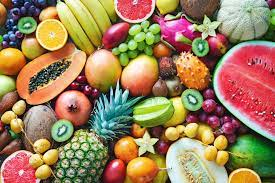
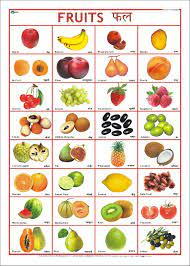
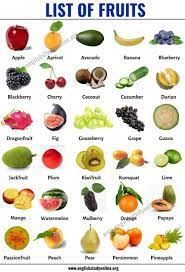
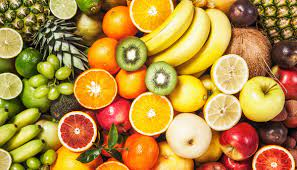
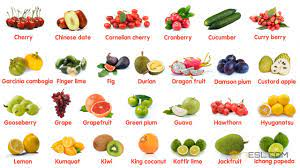
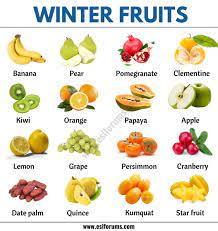
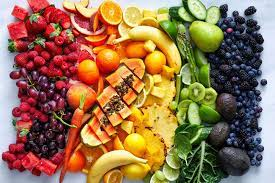
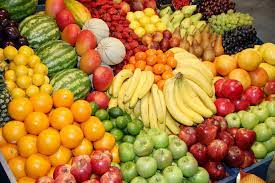
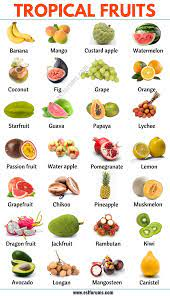
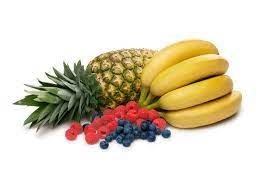

In [59]:
#extract the tag having urls
url1 = web_driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")

Fruit_url = [] #empty list
#to remove extra data other than output we required
for i in url1[0:10]:
    Fruit_url.append(i.get_attribute('src'))
Fruit_url

In [61]:
web_driver.close()

In [63]:
#connect to the web driver

web_driver = webdriver.Chrome(r"C:\Users\JAYASHRI\Downloads\chromedriver_win32\chromedriver.exe")

#Get url in web driver first

web_driver.get("https://images.google.com/")

In [64]:
cars_search = web_driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
#this will write text on search bar
cars_search.send_keys('cars')

In [66]:
#search button click
search_button = web_driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
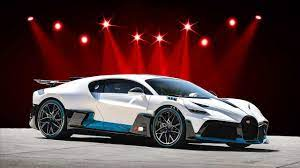
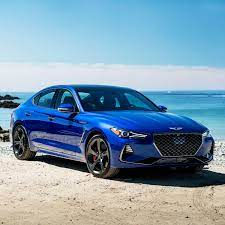
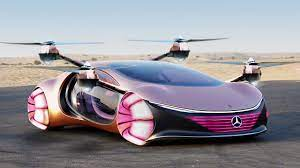
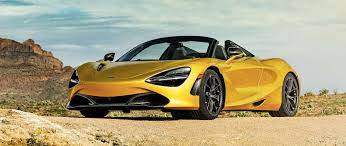
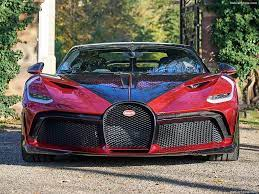
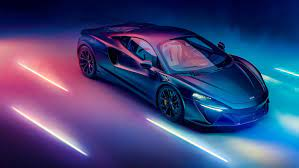
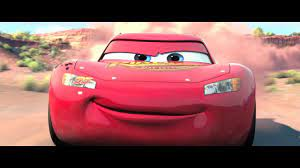
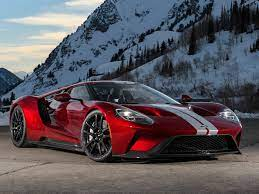
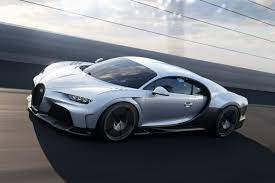
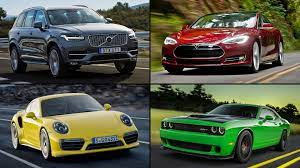

In [67]:
#extract the tag having urls
url1 = web_driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")

Car_url = [] #empty list
#to remove extra data other than output we required
for i in url1[0:10]:
    Car_url.append(i.get_attribute('src'))
Car_url

In [68]:
web_driver.close()

In [82]:
#connect to the web driver

web_driver = webdriver.Chrome(r"C:\Users\JAYASHRI\Downloads\chromedriver_win32\chromedriver.exe")

#Get url in web driver first

web_driver.get("https://images.google.com/")

In [83]:
machine_learning_search = web_driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
#this will write text on search bar
machine_learning_search.send_keys('machine learning')

In [85]:
#search button click
search_button = web_driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_button.click()

In [86]:
#extract the tag having urls
url1 = web_driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")

Machinelearning_url = [] #empty list
#to remove extra data other than output we required
for i in url1[0:10]:
    Machinelearning.append(i.get_attribute('src'))
Machinelearning_url

NameError: name 'Machinelearning' is not defined

In [87]:
web_driver.close()

In [88]:
#connect to the web driver

web_driver = webdriver.Chrome(r"C:\Users\JAYASHRI\Downloads\chromedriver_win32\chromedriver.exe")

#Get url in web driver first

web_driver.get("https://images.google.com/")

In [89]:
guitars_search = web_driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
#this will write text on search bar
guitars_search.send_keys('guitars')

In [90]:
#search button click
search_button = web_driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
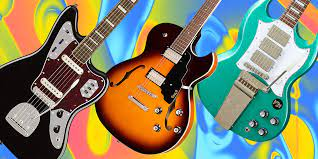
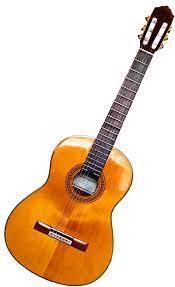
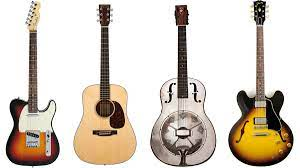
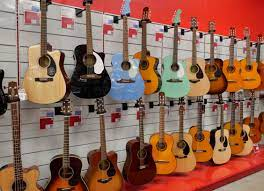
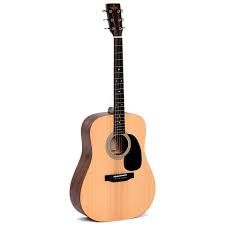
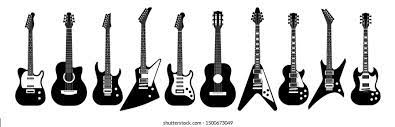
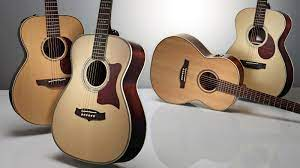
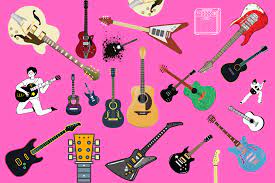
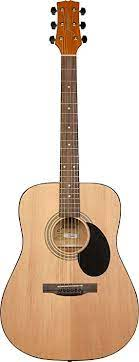
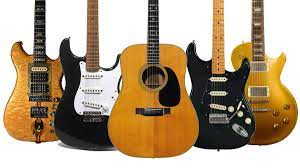

In [91]:
#extract the tag having urls
url1 = web_driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")

Guitar_url = [] #empty list
#to remove extra data other than output we required
for i in url1[0:10]:
    Guitar_url.append(i.get_attribute('src'))
Guitar_url

In [92]:
web_driver.close()

In [93]:
#connect to the web driver

web_driver = webdriver.Chrome(r"C:\Users\JAYASHRI\Downloads\chromedriver_win32\chromedriver.exe")

#Get url in web driver first

web_driver.get("https://images.google.com/")

In [94]:
cakes_search = web_driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
#this will write text on search bar
cakes_search.send_keys('cakes')

In [95]:
#search button click
search_button = web_driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
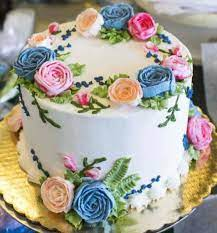
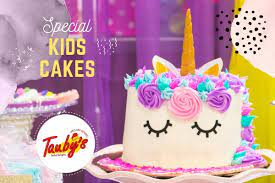
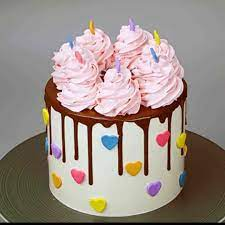
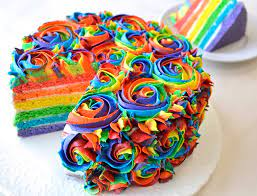
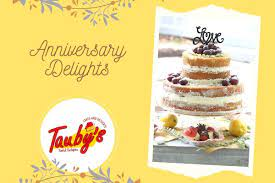
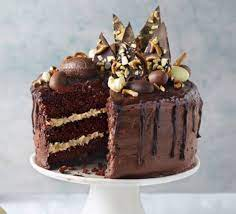
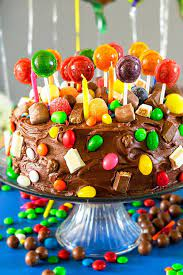
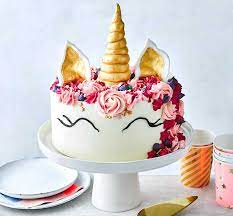
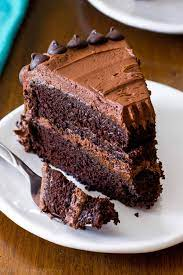
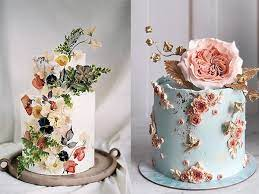

In [96]:
#extract the tag having urls
url1 = web_driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")

Cake_url = [] #empty list
#to remove extra data other than output we required
for i in url1[0:10]:
    Cake_url.append(i.get_attribute('src'))
Cake_url

In [97]:
web_driver.close()

#### 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

Ans :-

In [115]:
#connect to the web driver

web_driver = webdriver.Chrome(r"C:\Users\JAYASHRI\Downloads\chromedriver_win32\chromedriver.exe")

#Get url in web driver first

web_driver.get("https://www.flipkart.com/")

In [117]:
#inspect for product name field
product_search = web_driver.find_element_by_xpath("//input[@class='_3704LK']")
#this will write text on search bar
product_search.send_keys('smartphone')

#serch button click
search_button = web_driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
search_button.click()

In [118]:
#extract the tag having brand name
brand = web_driver.find_elements_by_xpath("//div[@class='_4rR01T']")

Brand_name = [] #empty list
#to remove extra data other than output we required
for i in brand:
    Brand_name.append(i.text)

In [119]:
Brand_name

['POCO C31 (Royal Blue, 64 GB)',
 'MOTOROLA G60 (Moonless, 128 GB)',
 'realme C35 (Glowing Black, 64 GB)',
 '(Refurbished) I Kall K280 (Slate Grey, 32 GB)',
 'realme C35 (Glowing Green, 64 GB)',
 'realme C35 (Glowing Black, 128 GB)',
 'realme C11 2021 (Cool Grey, 32 GB)',
 'I Kall Z8 Star (Green, 16 GB)',
 'MOTOROLA G60 (Dynamic Gray, 128 GB)',
 'REDMI Note 10T 5G (Mint Green, 64 GB)',
 'POCO C31 (Royal Blue, 32 GB)',
 'realme C11 2021 (Cool Blue, 64 GB)',
 'realme C11 2021 (Cool Grey, 64 GB)',
 'realme C11 2021 (Cool Blue, 32 GB)',
 'realme C31 (Dark Green, 32 GB)',
 'REDMI 10 (Midnight Black, 64 GB)',
 'MOTOROLA G60 (Soft Silver, 128 GB)',
 'REDMI Note 10T 5G (Graphite Black, 64 GB)',
 'MOTOROLA G60 (Frosted Champagne, 128 GB)',
 'REDMI 9i Sport (Coral Green, 64 GB)',
 'realme Narzo 50A (Oxygen Blue, 64 GB)',
 'REDMI Note 10T 5G (Mint Green, 128 GB)',
 'realme C31 (Light Silver, 32 GB)',
 'realme C31 (Dark Green, 64 GB)']

In [120]:
#extract the tag having urls of all pages
url = web_driver.find_elements_by_xpath("//div[@class='_2kHMtA']//a")

phone_urls = [] #empty list

#to remove extra data other than output we required
for i in url:
    phone_urls.append(i.get_attribute('href'))

In [121]:
Color = [] #empty list
#extract the tag having brand name
for i in phone_urls:
    web_driver.get(i)
    col = web_driver.find_elements_by_xpath("//td[@class='URwL2w col col-9-12']")
    for i in col[3:4:74]:
        Color.append(i.text) #to remove extra data other than output we required
Color

['Royal Blue',
 'Moonless',
 'Glowing Black',
 'Slate Grey',
 'Glowing Green',
 'Glowing Black',
 'Cool Grey',
 'Green',
 'Dynamic Gray',
 'Mint Green',
 'Royal Blue',
 'Cool Blue',
 'Cool Grey',
 'Cool Blue',
 'Dark Green',
 'Midnight Black',
 'Soft Silver',
 'Graphite Black',
 'Frosted Champagne',
 'Coral Green',
 'Oxygen Blue',
 'Mint Green',
 'Light Silver',
 'Dark Green']

In [122]:
RAM_ROM = [] #empty list
#extract the tag having brand name
for i in phone_urls:
    web_driver.get(i)
    ram = web_driver.find_elements_by_xpath("//li[@class='_21Ahn-']")
    for i in ram[0:1:14]:
        RAM_ROM.append(i.text) #to remove extra data other than output we required
RAM_ROM

['4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '6 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 'Grade: Unboxed - Like New',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 128 GB ROM | Expandable Upto 1 TB',
 '2 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '3 GB RAM | 16 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM',
 '3 GB RAM | 32 GB ROM | Expandable Upto 512 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '2 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '3 GB RAM | 32 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '6 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '6 GB RAM | 128 GB ROM',
 '3 GB RAM | 32 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB']

In [123]:
Camera = [] #empty list
#extract the tag having brand name
for i in phone_urls:
    web_driver.get(i)
    p_cam = web_driver.find_elements_by_xpath("//li[@class='_21Ahn-']")
    for i in p_cam[2:3:14]:
        Camera.append(i.text)

In [124]:
Camera

['13MP + 2MP + 2MP | 5MP Front Camera',
 '108MP + 8MP + 2MP | 32MP Front Camera',
 '50MP + 2MP + 0.3MP | 8MP Front Camera',
 '3 GB RAM | 32 GB ROM |',
 '50MP + 2MP + 0.3MP | 8MP Front Camera',
 '50MP + 2MP + 0.3MP | 8MP Front Camera',
 '8MP Rear Camera | 5MP Front Camera',
 '8MP Rear Camera',
 '108MP + 8MP + 2MP | 32MP Front Camera',
 '48MP Primary Camera + 2MP Macro Lens + 2MP Depth Sensor | 8MP Front Camera',
 '13MP + 2MP + 2MP | 5MP Front Camera',
 '8MP Rear Camera | 5MP Front Camera',
 '8MP Rear Camera | 5MP Front Camera',
 '8MP Rear Camera | 5MP Front Camera',
 '13MP + 2MP + 0.3MP | 5MP Front Camera',
 '50MP + 2MP | 5MP Front Camera',
 '108MP + 8MP + 2MP | 32MP Front Camera',
 '48MP Primary Camera + 2MP Macro Lens + 2MP Depth Sensor | 8MP Front Camera',
 '108MP + 8MP + 2MP | 32MP Front Camera',
 '13MP Rear Camera | 5MP Front Camera',
 '50MP + 2MP + 2MP | 8MP Front Camera',
 '48MP Primary Camera + 2MP Macro Lens + 2MP Depth Sensor | 8MP Front Camera',
 '13MP + 2MP + 0.3MP | 5MP Fro

In [125]:
Display_size = [] #empty list
#extract the tag having brand name
for i in phone_urls:
    web_driver.get(i)
    D_size = web_driver.find_elements_by_xpath("//li[@class='_21Ahn-']")
    for i in D_size[1:2:14]:
        Display_size.append(i.text)
Display_size

['16.59 cm (6.53 inch) HD+ Display',
 '17.22 cm (6.78 inch) Full HD+ Display',
 '16.76 cm (6.6 inch) Full HD+ Display',
 'Original Charger & Cable',
 '16.76 cm (6.6 inch) Full HD+ Display',
 '16.76 cm (6.6 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '13.84 cm (5.45 inch) Display',
 '17.27 cm (6.8 inch) Full HD+ Display',
 '16.66 cm (6.56 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.56 cm (6.52 inch) HD Display',
 '17.02 cm (6.7 inch) HD+ Display',
 '17.22 cm (6.78 inch) Full HD+ Display',
 '16.66 cm (6.56 inch) Full HD+ Display',
 '17.22 cm (6.78 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.66 cm (6.56 inch) Full HD+ Display',
 '16.56 cm (6.52 inch) HD Display',
 '16.56 cm (6.52 inch) HD Display']

In [126]:
Battery_capicity = [] #empty list
#extract the tag having brand name
for i in phone_urls:
    web_driver.get(i)
    bat = web_driver.find_elements_by_xpath("//li[@class='_21Ahn-']")
    for i in bat[3:4:14]:
        Battery_capicity.append(i.text)
Battery_capicity

['5000 mAh Lithium-ion Polymer Battery',
 '6000 mAh Battery',
 '5000 mAh Lithium Polymer Battery',
 '6.26 inch Display',
 '5000 mAh Lithium Polymer Battery',
 '5000 mAh Lithium Polymer Battery',
 '5000 mAh Battery',
 '2800 mAh Battery',
 '6000 mAh Battery',
 '5000 mAh Lithium Polymer Battery',
 '5000 mAh Lithium-ion Polymer Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '6000 mAh Lithium Polymer Battery',
 '6000 mAh Battery',
 '5000 mAh Lithium Polymer Battery',
 '6000 mAh Battery',
 '5000 mAh Li-Polymer Battery',
 '6000 mAh Battery',
 '5000 mAh Lithium Polymer Battery',
 '5000 mAh Battery',
 '5000 mAh Battery']

In [127]:
Price = [] #empty list
#extract the tag having brand name
for i in phone_urls:
    web_driver.get(i)
    price = web_driver.find_elements_by_xpath("//div[@class='_30jeq3 _16Jk6d']")
    for i in price:
        Price.append(i.text)
Price

['₹8,499',
 '₹14,999',
 '₹11,999',
 '₹5,499',
 '₹11,999',
 '₹12,999',
 '₹7,499',
 '₹4,849',
 '₹14,999',
 '₹11,999',
 '₹7,499',
 '₹8,999',
 '₹8,999',
 '₹7,499',
 '₹9,299',
 '₹10,499',
 '₹14,999',
 '₹11,999',
 '₹14,999',
 '₹8,799',
 '₹11,499',
 '₹13,999',
 '₹9,299',
 '₹9,999']

In [129]:
#connect to the web driver

web_driver = webdriver.Chrome(r"C:\Users\JAYASHRI\Downloads\chromedriver_win32\chromedriver.exe")

#Get url in web driver first

web_driver.get("https://www.flipkart.com/")

In [130]:
#inspect for product name field
product_search = web_driver.find_element_by_xpath("//input[@class='_3704LK']")
#this will write text on search bar
product_search.send_keys('smartphone')

#serch button click
search_button = web_driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
search_button.click()

In [132]:
#extract the tag having urls of all pages
url = web_driver.find_elements_by_xpath("//img[@class='_396cs4 _3exPp9']")

URL = [] #empty list

#to remove extra data other than output we required
for i in url:
    URL.append(i.get_attribute('src'))
URL

['https://rukminim2.flixcart.com/image/312/312/ku4ezrk0/mobile/p/e/4/c31-mzb0a0jin-poco-original-imag7bzqxgdhgf2n.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/312/312/l0fm07k0/mobile/1/k/g/-original-imagc7ukmgugpdfy.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/312/312/l0o6nbk0/mobile/y/s/e/-original-imagceu559m75mks.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/312/312/l0fm07k0/mobile/y/g/i/-original-imagc7ryyhrrcgxh.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/312/312/l0fm07k0/mobile/1/k/g/-original-imagc7ukmgugpdfy.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/312/312/knoxnrk0/mobile/g/1/j/g60-panb0000in-panb0016in-panb0012in-panb0014in-motorola-original-imag2aq9v8hzetbn.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/312/312/kqjtd3k0/mobile/s/b/8/c11-2021-rmx3231-realme-original-imag4j4xkqchhfxk.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/312/312/l0igvww0/mobile/9/a/w/-original-imagcaaw5gzbdtxj.jpeg?q=70',
 'https://rukminim2.flixcart.com/image/

In [134]:
print(len(Brand_name),len(Color),len(RAM_ROM),len(Camera),len(Display_size),len(Battery_capicity),len(Price),len(URL))

24 24 24 24 24 24 24 29


In [135]:
# Make data frame of Smartphones from flipkart.com
Smartphones = pd.DataFrame({})
Smartphones['Brand Name']= Brand_name
Smartphones['Colour'] = Color
Smartphones['RAM ROM'] = RAM_ROM 
Smartphones['Camera'] = Camera
Smartphones['Display size'] =Display_size 
Smartphones['Battery capicity'] = Battery_capicity
Smartphones['Price'] = Price
Smartphones['URL'] = URL[0:24]
Smartphones

,Brand Name,Colour,RAM ROM,Camera,Display size,Battery capicity,Price,URL
0,"POCO C31 (Royal Blue, 64 GB)",Royal Blue,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,13MP + 2MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,5000 mAh Lithium-ion Polymer Battery,"₹8,499",https://rukminim2.flixcart.com/image/312/312/k...
1,"MOTOROLA G60 (Moonless, 128 GB)",Moonless,6 GB RAM | 128 GB ROM,108MP + 8MP + 2MP | 32MP Front Camera,17.22 cm (6.78 inch) Full HD+ Display,6000 mAh Battery,"₹14,999",https://rukminim2.flixcart.com/image/312/312/l...
2,"realme C35 (Glowing Black, 64 GB)",Glowing Black,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,50MP + 2MP + 0.3MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,5000 mAh Lithium Polymer Battery,"₹11,999",https://rukminim2.flixcart.com/image/312/312/l...
3,"(Refurbished) I Kall K280 (Slate Grey, 32 GB)",Slate Grey,Grade: Unboxed - Like New,3 GB RAM | 32 GB ROM |,Original Charger & Cable,6.26 inch Display,"₹5,499",https://rukminim2.flixcart.com/image/312/312/l...
4,"realme C35 (Glowing Green, 64 GB)",Glowing Green,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,50MP + 2MP + 0.3MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,5000 mAh Lithium Polymer Battery,"₹11,999",https://rukminim2.flixcart.com/image/312/312/l...
5,"realme C35 (Glowing Black, 128 GB)",Glowing Black,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 2MP + 0.3MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,5000 mAh Lithium Polymer Battery,"₹12,999",https://rukminim2.flixcart.com/image/312/312/k...
6,"realme C11 2021 (Cool Grey, 32 GB)",Cool Grey,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,8MP Rear Camera | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,"₹7,499",https://rukminim2.flixcart.com/image/312/312/k...
7,"I Kall Z8 Star (Green, 16 GB)",Green,3 GB RAM | 16 GB ROM,8MP Rear Camera,13.84 cm (5.45 inch) Display,2800 mAh Battery,"₹4,849",https://rukminim2.flixcart.com/image/312/312/l...
8,"MOTOROLA G60 (Dynamic Gray, 128 GB)",Dynamic Gray,6 GB RAM | 128 GB ROM,108MP + 8MP + 2MP | 32MP Front Camera,17.27 cm (6.8 inch) Full HD+ Display,6000 mAh Battery,"₹14,999",https://rukminim2.flixcart.com/image/312/312/k...
9,"REDMI Note 10T 5G (Mint Green, 64 GB)",Mint Green,4 GB RAM | 64 GB ROM,48MP Primary Camera + 2MP Macro Lens + 2MP Dep...,16.66 cm (6.56 inch) Full HD+ Display,5000 mAh Lithium Polymer Battery,"₹11,999",https://rukminim2.flixcart.com/image/312/312/k...


In [136]:
Smartphones.to_csv("Smartphones.csv")

#### 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps

Ans :-

In [138]:
#connect to the web driver

web_driver = webdriver.Chrome(r"C:\Users\JAYASHRI\Downloads\chromedriver_win32\chromedriver.exe")

#Get url in web driver first

web_driver.get("https://www.google.co.in/maps")

In [140]:
city = input('Enter City Name : ')                                         # Enter city to be searched
search = web_driver.find_element_by_id("searchboxinput")                       # locating search bar
search.clear()

Enter City Name : Nagpur


In [141]:
search.send_keys(city)                                                     # entering values in search bar
button = web_driver.find_element_by_id("searchbox-searchbutton")               # locating search button
button.click()

In [143]:
import re
try:
    url_string = web_driver.current_url
    print("URL Extracted: ", url_string)
    lat_lng = re.findall(r'@(.*)data',url_string)
    if len(lat_lng):
        lat_lng_list = lat_lng[0].split(",")
        if len(lat_lng_list)>=2:
            lat = lat_lng_list[0]
            lng = lat_lng_list[1]
        print("Latitude = {}, Longitude = {}".format(lat, lng))

except Exception as e:
        print("Error: ", str(e))

URL Extracted:  https://www.google.co.in/maps/place/Nagpur,+Maharashtra/@21.1610714,79.0024695,12z/data=!3m1!4b1!4m5!3m4!1s0x3bd4c0a5a31faf13:0x19b37d06d0bb3e2b!8m2!3d21.1458004!4d79.0881546
Latitude = 21.1610714, Longitude = 79.0024695


In [144]:
web_driver.close()

#### 6. Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) from trak.in.

Ans :-

In [3]:
#connect to the web driver

web_driver = webdriver.Chrome(r"C:\Users\JAYASHRI\Downloads\chromedriver_win32\chromedriver.exe")

#Get url in web driver first

web_driver.get("https://trak.in/")

In [4]:
button = web_driver.find_element_by_xpath('//li[@id="menu-item-51510"]/a').get_attribute('href')
web_driver.get(button)

In [5]:
Date = []
Startup_name= []
Industry_vertical = []
Sub_vertical = []
Location = []
Investor = []
Investment_type = []
Amount_USD = []

In [6]:
for i in range(54,57):
    web_driver.find_element_by_xpath('//div[@id="tablepress-{}_wrapper"]/div/label/select/option[4]'.format(i)).click()
    
    # Date
    dt = web_driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[2]'.format(i))
    for d in dt:
        Date.append(d.text)

    # Startup Name
    sn = web_driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[3]'.format(i))
    for n in sn:
        Startup_name.append(n.text)
    
    # Industry/Vertical
    ind = web_driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[4]'.format(i))
    for n in ind:
        Industry_vertical.append(n.text)
    
    # Sub-Vertical
    sv = web_driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[5]'.format(i))
    for s in sv:
        Sub_vertical.append(s.text)

    # Location
    loc = web_driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[6]'.format(i))
    for l in loc:
        Location.append(l.text)
    
    # Investor
    inv = web_driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[7]'.format(i))
    for n in inv:
        Investor.append(n.text)
        
    # Investment Type
    invt = web_driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[8]'.format(i))
    for n in invt:
        Investment_type.append(n.text)
    
    # Amount
    amt = web_driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[9]'.format(i))
    for a in amt:
        Amount_USD.append(a.text)

In [7]:
fund_dict = pd.DataFrame({})
fund_dict['Date'] = Date
fund_dict['Startup Name'] = Startup_name
fund_dict['Industry/Vertical'] = Industry_vertical
fund_dict['Sub-Vertical'] = Sub_vertical
fund_dict['Location'] = Location
fund_dict['Investor'] = Investor
fund_dict['Investment Type'] = Investment_type
fund_dict['Amount(in USD)'] = Amount_USD

In [8]:
fund_dict

,Date,Startup Name,Industry/Vertical,Sub-Vertical,Location,Investor,Investment Type,Amount(in USD)
0,15/01/2021,Digit Insurance,Financial Services,Insurance Services,Bengaluru,"A91 Partners, Faering Capital, TVS Capital Funds",Venture,"1,80,00,000"
1,28/01/2021,Bombay Shaving Company,Consumer Goods Company,"Shave care, beard care, and skincare products",New Delhi,Reckitt Benckiser,Venture,"6,172,258.50"
2,19/01/2021,DeHaat,AgriTech Startup,online marketplace for farm products and services,Patna,Prosus Ventures,Series C,"30,000,000"
3,19/01/2021,Darwinbox,SaaS,HR Tech,Mumbai,Salesforce Ventures,Seed,"15,000,000"
4,18/01/2021,mfine,Health Tech Startup,AI-powered telemedicine mobile app,Bengaluru,Heritas Capital Management,Venture Round,"16,000,000"
5,18/01/2021,Udayy,EdTech,Online learning platform for kids in class 1-5,Gurgaon,Sequoia Capital,Seed Funding,"15,000,000"
6,11/01/2021,True Elements,Food Startup,Whole Food plant based Nashta,Pune,SIDBI Venture Capital,Series,"100,000,000"
7,13/01/2021,Saveo,B2B E-commerce,Pharmacies,Bengaluru,"Matrix Partners India, RTP Global, others",Seed,"4,000,000"
8,11/02/2021,Doubtnut,Edu Tech,E-Learning Platform,Gurgaon,"SIG Global, Sequoia Capital, WaterBridge Ventu...",Series B,"2,500,000"
9,22/02/2021,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,"Tiger Global, Kora",Venture,"250,000,000"


In [9]:
web_driver.close()

#### 7. Write a program to scrap all the available details of best gaming laptops from digit.in.

Ans :-

In [10]:
#connect to the web driver

web_driver = webdriver.Chrome(r"C:\Users\JAYASHRI\Downloads\chromedriver_win32\chromedriver.exe")

#Get url in web driver first

web_driver.get("https://www.digit.in/")

In [11]:
#best gaming laptops link
best_gaming = web_driver.find_element_by_xpath("/html/body/div[3]/div/div[2]/div[2]/div[4]/ul/li[9]/a")
web_driver.get(best_gaming.get_attribute('href'))

In [12]:
# creating empty lists
name = []
price = []
OS = []
display = []
processor = []
memory = []
weight = []
dimension = []
graphics_processor = []

In [13]:
#names
names=web_driver.find_elements_by_xpath("//div[@class='right-container']/div/a/h3")
for i in names:
    name.append(i.text)

In [14]:
name

['MSI RAIDER GE76',
 'ASUS ROG STRIX SCAR 15',
 'ACER NITRO 5',
 'MSI STEALTH 15M',
 'ASUS ROG STRIX SCAR 15',
 'ASUS ROG STRIX SCAR 15',
 'ASUS ZEPHYRUS G14',
 'HP OMEN 16',
 'ASUS ROG ZEPHYRUS DUO 15',
 'ACER ASPIRE 7 GAMING LAPTOP']

In [15]:
#price
prices=web_driver.find_elements_by_xpath("//td[@class='smprice']")
for i in prices:
    price.append(i.text)

In [16]:
price

['₹ 429,940',
 '₹ 285,390',
 '₹ 129,990',
 '₹ 134,990',
 '₹ 193,990',
 '₹ 215,990',
 '₹ 144,990',
 '₹ 139,990',
 '₹ 185,000',
 '₹ 53,490']

In [17]:
#os
os=web_driver.find_elements_by_xpath("//div[@class='product-detail']/div/ul/li[1]/div/div")
for i in os:
    OS.append(i.text)
OS

['WINDOWS 11 HOME',
 'WINDOWS 11 HOME',
 'WINDOWS 10',
 'WINDOWS 10',
 'WINDOWS 10',
 'WINDOWS 10 HOME',
 'WINDOWS 10 HOME',
 'WINDOWS 11 HOME',
 'WINDOWS 10',
 'WINDOWS 10 HOME']

In [18]:
#display
displays=web_driver.find_elements_by_xpath("//div[@class='product-detail']/div/ul/li[2]/div/div")
for i in displays:
    display.append(i.text)
display

['17" (3840 X 2160)',
 '15.6" (2560 X 1440)',
 '15.6" (1920 X 1080)',
 '15.6" (1920 X 1080)',
 '15.6" (2560 X 1440)',
 '15.6" (1920 X 1080)',
 '14" (1920 X 1080)',
 '16.1" (1920 X 1080)',
 '15.6" (3840 X 1100)',
 '15.6" (1920 X 1080)']

In [19]:
#processor
processors=web_driver.find_elements_by_xpath("//div[@class='product-detail']/div/ul/li[4]/div/div")
for i in processors:
    processor.append(i.text)
processor

['12TH GEN INTEL CORE I9-12900HK | 5 GHZ',
 '12TH GEN INTEL CORE I9-12900H | 2.5 GHZ',
 'AMD RYZEN 9 OCTA CORE | 2.4 GHZ',
 'INTEL CORE I7 11TH GEN - 11375H | NA',
 'AMD RYZEN 9 OCTA CORE - 5900HX | 3.3 GHZ',
 'AMD RYZEN™ 9 5900HX | 3.3 GHZ',
 'AMD 3RD GEN RYZEN 9 | 3.3 GHZ',
 '12TH GEN INTEL CORE I7-12700H | 4.7 GHZ',
 'INTEL CORE I7 10TH GEN 10875H | NA',
 'AMD RYZEN™ 5-5500U HEXA-CORE | NA']

In [20]:
#memory
memories=web_driver.find_elements_by_xpath("//div[@class='product-detail']/div/ul/li[5]/div/div")
for i in memories:
    memory.append(i.text)
memory

['2 TB SSD/16 GBGB DDR5',
 '2 TB SSD/32 GBGB DDR5',
 '1 TB HDD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '2 TB SSD/32 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '512 GB SSD/4 GBGB DDR4',
 '512 GB SSD/8 GBGB DDR4']

In [21]:
#weight
weights=web_driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[7]/td[3]")
for i in weights:
    weight.append(i.text)
weight

['2.9', '2.3', '2.4', '1.7', '2.30', '2.30', '1.65', '2.32', '2.4', '2.15']

In [22]:
#dimension
dimensions=web_driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[8]/td[3]")
for i in dimensions:
    dimension.append(i.text)
dimension

['397 x 284 x 26',
 '259 x 354 x 27',
 '363.4 x 255 x 23.9',
 '358.3 x 248 x 16.15',
 '354 x 259 x 22.6',
 '35.4 x 25.9 x 2.26',
 '32.5 x 22.1 x 1.8',
 '36.92 x 24.8 x 2.3',
 '268.30 x 360.00 x 20.90',
 '2.29 x 36.3 x 25.4']

In [23]:
#graphics_processor
GPU=web_driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[9]/td[3]")
for i in GPU:
    graphics_processor.append(i.text)
graphics_processor

['NVIDIA GeForce RTX 3080Ti',
 'NVIDIA GeForce RTX 3070 Ti',
 'NVIDIA GeForce RTX 3070',
 'NVIDIA GeForce RTX 3060',
 'NVIDIA GeForce RTX 3080',
 'NVIDIA® GeForce RTX™ 3070',
 'NVIDIA GeForce RTX 2060',
 'NVIDIA GeForce RTX 3060',
 'NVIDIA GeForce RTX 2070 Max-Q',
 'NVIDIA® GeForce® GTX 1650']

In [24]:
game_laptop = pd.DataFrame({})
game_laptop['Laptop Name'] = name
game_laptop['Laptop Price'] = price
game_laptop['Operating System'] = OS
game_laptop['Display'] = display
game_laptop['Processor'] = processor
game_laptop['Memory'] = memory
game_laptop['Weight'] = weight
game_laptop['Dimension'] = dimension
game_laptop['Graphics Processor'] = graphics_processor

In [25]:
game_laptop

,Laptop Name,Laptop Price,Operating System,Display,Processor,Memory,Weight,Dimension,Graphics Processor
0,MSI RAIDER GE76,"₹ 429,940",WINDOWS 11 HOME,"17"" (3840 X 2160)",12TH GEN INTEL CORE I9-12900HK | 5 GHZ,2 TB SSD/16 GBGB DDR5,2.9,397 x 284 x 26,NVIDIA GeForce RTX 3080Ti
1,ASUS ROG STRIX SCAR 15,"₹ 285,390",WINDOWS 11 HOME,"15.6"" (2560 X 1440)",12TH GEN INTEL CORE I9-12900H | 2.5 GHZ,2 TB SSD/32 GBGB DDR5,2.3,259 x 354 x 27,NVIDIA GeForce RTX 3070 Ti
2,ACER NITRO 5,"₹ 129,990",WINDOWS 10,"15.6"" (1920 X 1080)",AMD RYZEN 9 OCTA CORE | 2.4 GHZ,1 TB HDD/16 GBGB DDR4,2.4,363.4 x 255 x 23.9,NVIDIA GeForce RTX 3070
3,MSI STEALTH 15M,"₹ 134,990",WINDOWS 10,"15.6"" (1920 X 1080)",INTEL CORE I7 11TH GEN - 11375H | NA,1 TB SSD/16 GBGB DDR4,1.7,358.3 x 248 x 16.15,NVIDIA GeForce RTX 3060
4,ASUS ROG STRIX SCAR 15,"₹ 193,990",WINDOWS 10,"15.6"" (2560 X 1440)",AMD RYZEN 9 OCTA CORE - 5900HX | 3.3 GHZ,2 TB SSD/32 GBGB DDR4,2.30,354 x 259 x 22.6,NVIDIA GeForce RTX 3080
5,ASUS ROG STRIX SCAR 15,"₹ 215,990",WINDOWS 10 HOME,"15.6"" (1920 X 1080)",AMD RYZEN™ 9 5900HX | 3.3 GHZ,1 TB SSD/16 GBGB DDR4,2.30,35.4 x 25.9 x 2.26,NVIDIA® GeForce RTX™ 3070
6,ASUS ZEPHYRUS G14,"₹ 144,990",WINDOWS 10 HOME,"14"" (1920 X 1080)",AMD 3RD GEN RYZEN 9 | 3.3 GHZ,1 TB SSD/16 GBGB DDR4,1.65,32.5 x 22.1 x 1.8,NVIDIA GeForce RTX 2060
7,HP OMEN 16,"₹ 139,990",WINDOWS 11 HOME,"16.1"" (1920 X 1080)",12TH GEN INTEL CORE I7-12700H | 4.7 GHZ,1 TB SSD/16 GBGB DDR4,2.32,36.92 x 24.8 x 2.3,NVIDIA GeForce RTX 3060
8,ASUS ROG ZEPHYRUS DUO 15,"₹ 185,000",WINDOWS 10,"15.6"" (3840 X 1100)",INTEL CORE I7 10TH GEN 10875H | NA,512 GB SSD/4 GBGB DDR4,2.4,268.30 x 360.00 x 20.90,NVIDIA GeForce RTX 2070 Max-Q
9,ACER ASPIRE 7 GAMING LAPTOP,"₹ 53,490",WINDOWS 10 HOME,"15.6"" (1920 X 1080)",AMD RYZEN™ 5-5500U HEXA-CORE | NA,512 GB SSD/8 GBGB DDR4,2.15,2.29 x 36.3 x 25.4,NVIDIA® GeForce® GTX 1650


In [26]:
game_laptop.to_csv("Best gaming laptops.csv")

In [27]:
web_driver.close()

#### 8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

Ans :-

In [3]:
#connect to the web driver

web_driver = webdriver.Chrome(r"C:\Users\JAYASHRI\Downloads\chromedriver_win32\chromedriver.exe")

#Get url in web driver first

web_driver.get("https://www.forbes.com/")

In [4]:
# menu button click
menu_button = web_driver.find_element_by_xpath("//button[@class='icon--hamburger']")
menu_button.click()

In [5]:
# billionaires button click
billionaires_button = web_driver.find_element_by_xpath("//li[@class='header__channel header__color--centennial-silver header__hoverable']")
billionaires_button.click()

In [6]:
# Creating empty list
rank = []
name = []
net_worth = []
age =[]
citizenship = []
source = []
industry = []

In [8]:
# rank
ranks=web_driver.find_elements_by_xpath("//div[@class='rank']")
for i in ranks:
    rank.append(i.text)
rank

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '19.',
 '21.',
 '21.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '28.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '37.',
 '39.',
 '40.',
 '41.',
 '41.',
 '43.',
 '43.',
 '45.',
 '46.',
 '47.',
 '48.',
 '49.',
 '50.',
 '51.',
 '52.',
 '53.',
 '54.',
 '55.',
 '56.',
 '56.',
 '56.',
 '59.',
 '60.',
 '61.',
 '62.',
 '63.',
 '64.',
 '65.',
 '66.',
 '67.',
 '67.',
 '69.',
 '70.',
 '71.',
 '71.',
 '73.',
 '74.',
 '75.',
 '76.',
 '77.',
 '78.',
 '79.',
 '80.',
 '81.',
 '82.',
 '83.',
 '84.',
 '85.',
 '85.',
 '87.',
 '88.',
 '89.',
 '90.',
 '91.',
 '91.',
 '91.',
 '94.',
 '94.',
 '96.',
 '97.',
 '98.',
 '99.',
 '100.',
 '100.',
 '102.',
 '103.',
 '104.',
 '104.',
 '106.',
 '106.',
 '106.',
 '106.',
 '110.',
 '111.',
 '112.',
 '113.',
 '114.',
 '115.',
 '116.',
 '117.',
 '117.',
 '119.',
 '119.',
 '121.',
 '121.',
 '123.',
 

In [9]:
# name
names=web_driver.find_elements_by_xpath("//div[@class='personName']/div")
for i in names:
    name.append(i.text)
name

['Elon Musk',
 'Jeff Bezos',
 'Bernard Arnault & family',
 'Bill Gates',
 'Warren Buffett',
 'Larry Page',
 'Sergey Brin',
 'Larry Ellison',
 'Steve Ballmer',
 'Mukesh Ambani',
 'Gautam Adani & family',
 'Michael Bloomberg',
 'Carlos Slim Helu & family',
 'Francoise Bettencourt Meyers & family',
 'Mark Zuckerberg',
 'Jim Walton',
 'Zhong Shanshan',
 'Alice Walton',
 'Rob Walton',
 'Changpeng Zhao',
 'Charles Koch',
 'Julia Koch & family',
 'Amancio Ortega',
 'Michael Dell',
 'Zhang Yiming',
 'David Thomson & family',
 'Phil Knight & family',
 'Dieter Schwarz',
 'Robin Zeng',
 'MacKenzie Scott',
 'Rodolphe Saadé & family',
 'François Pinault & family',
 'Klaus-Michael Kuehne',
 'Ma Huateng',
 'Beate Heister & Karl Albrecht Jr. & family',
 'Giovanni Ferrero',
 'Li Ka-shing',
 'Stephen Schwarzman',
 'Lee Shau Kee',
 'Len Blavatnik',
 'Jacqueline Mars',
 'John Mars',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'German Larrea Mota Velasco & family',
 'Gina Rinehart',
 'Shiv Nadar',
 'Jim Si

In [10]:
# net worth
netw=web_driver.find_elements_by_xpath("//div[@class='netWorth']/div")
for i in netw:
    net_worth.append(i.text)
    
# age
ages=web_driver.find_elements_by_xpath("//div[@class='age']")
for i in ages:
    age.append(i.text)
    
# citizenship
citizens=web_driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
for i in citizens:
    citizenship.append(i.text)
    
# source
sources=web_driver.find_elements_by_xpath("//div[@class='source']")
for i in sources:
    source.append(i.text)

In [12]:
# industry
industries=web_driver.find_elements_by_xpath("//div[@class='category']")
for i in industries:
    industry.append(i.text)
industry

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


In [13]:
len(industry)

400

In [14]:
billionaire = pd.DataFrame({})
billionaire['Rank'] = rank
billionaire['Name'] = name
billionaire['Net Worth'] = net_worth
billionaire['Age'] = age
billionaire['Citizenship'] = citizenship
billionaire['Source'] = source
billionaire['Industry'] = industry[200:400]

billionaire

,Rank,Name,Net Worth,Age,Citizenship,Source,Industry
0,1.,Elon Musk,$219 B,,United States,,Automotive
1,2.,Jeff Bezos,$171 B,,United States,,Technology
2,3.,Bernard Arnault & family,$158 B,,France,,Fashion & Retail
3,4.,Bill Gates,$129 B,,United States,,Technology
4,5.,Warren Buffett,$118 B,,United States,,Finance & Investments
...,...,...,...,...,...,...,...
195,192.,Marcel Herrmann Telles,$10.3 B,,Brazil,beer,Food & Beverage
196,197.,Leon Black,$10 B,,United States,private equity,Finance & Investments
197,197.,Joe Gebbia,$10 B,,United States,Airbnb,Technology
198,197.,David Geffen,$10 B,,United States,"movies, record labels",Media & Entertainment


In [15]:
billionaire.to_csv("World's Billionaire.csv")

In [16]:
web_driver.close()

#### 9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

Ans :-

In [40]:
#connect to the web driver

web_driver = webdriver.Chrome(r"C:\Users\JAYASHRI\Downloads\chromedriver_win32\chromedriver.exe")

#Get url in web driver first

web_driver.get("https://www.youtube.com/")

In [41]:
# video search button click
video_search = web_driver.find_element_by_xpath("/html/body/ytd-app/div[1]/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/form/div[1]/div[1]/input")
video_search.send_keys("machine learning")

In [42]:
search_button=web_driver.find_element_by_xpath("/html/body/ytd-app/div[1]/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/button/yt-icon")
search_button.click()

In [43]:
#press video button click
video_button = web_driver.find_element_by_xpath("//a[@class='yt-simple-endpoint style-scope ytd-video-renderer']")
video_button.click()

In [72]:
#extract the tag having Comments
comments = web_driver.find_elements_by_xpath("//yt-formatted-string[@class='style-scope ytd-comment-renderer']")

#to remove extra data other than output we required
Comments = [] #empty list

for i in comments:
    Comments.append(i.text)

In [73]:
COMMENTS = []
for i in range(1, len(Comments), 2):
    COMMENTS.append(Comments[i])
COMMENTS

['Got a question on the topic? Please share it in the comment section below and our experts will answer it for you. For Edureka Machine Learning & AI Masters Course Curriculum, Visit our Website: http://bit.ly/2QixjBC (Use Code "𝐘𝐎𝐔𝐓𝐔𝐁𝐄𝟐𝟎") Here is the video timeline: 2:47 What is Machine Learning?\n\n4:08 AI vs ML vs Deep Learning\n\n5:43 How does Machine Learning works?\n\n6:18 Types of Machine Learning\n\n6:43 Supervised Learning\n\n8:38 Supervised Learning Examples\n\n11:49 Unsupervised Learning\n\n13:54 Unsupervised Learning Examples\n\n16:09 Reinforcement Learning\n\n18:39 Reinforcement Learning Examples\n\n19:34 AI vs Machine Learning vs Deep Learning\n\n22:09 Examples of AI\n\n23:39 Examples of Machine Learning\n\n25:04 What is Deep Learning?\n\n25:54 Example of Deep Learning\n\n27:29 Machine Learning vs Deep Learning\n\n33:49 Jupyter Notebook Tutorial\n\n34:49 Installation\n\n50:24 Machine Learning Tutorial\n\n51:04 Classification Algorithm\n\n51:39 Anomaly Detection Algorithm

In [74]:
#extract the tag having Comments upvoted
comments_up = web_driver.find_elements_by_xpath("//span[@class='style-scope ytd-comment-action-buttons-renderer']")

#to remove extra data other than output we required
Comments_upvoted = [] #empty list

for i in comments_up:
    Comments_upvoted.append(i.text)

In [75]:
COMMENTS_UPVOTED = []
for i in range(1, len(Comments_upvoted), 2):
    COMMENTS_UPVOTED.append(Comments_upvoted[i])
COMMENTS_UPVOTED

['230',
 '225',
 '946',
 '239',
 '260',
 '59',
 '20',
 '20',
 '25',
 '64',
 '435',
 '4',
 '32',
 '8',
 '1',
 '4',
 '2',
 '1',
 '62',
 '11',
 '6',
 '3',
 '52',
 '5',
 '42',
 '7',
 '3',
 '49',
 '1',
 '2',
 '6',
 '3',
 '5',
 '',
 '3',
 '3',
 '2',
 '20',
 '',
 '4',
 '4',
 '1',
 '',
 '34',
 '37',
 '14',
 '4',
 '3',
 '2',
 '1',
 '2',
 '2',
 '7',
 '1',
 '',
 '',
 '1',
 '1',
 '18',
 '',
 '5',
 '2',
 '',
 '1',
 '',
 '2',
 '3',
 '',
 '6',
 '1',
 '1',
 '2',
 '17',
 '3',
 '1',
 '',
 '1',
 '5',
 '15',
 '',
 '31',
 '',
 '',
 '1',
 '',
 '',
 '13',
 '',
 '2',
 '2',
 '',
 '',
 '48',
 '1',
 '',
 '1',
 '',
 '',
 '3',
 '2',
 '3',
 '',
 '',
 '1',
 '',
 '',
 '17',
 '',
 '2',
 '1',
 '',
 '',
 '86',
 '2',
 '',
 '2',
 '',
 '1',
 '5',
 '',
 '3',
 '',
 '',
 '',
 '',
 '',
 '4',
 '',
 '',
 '1',
 '',
 '',
 '7',
 '',
 '',
 '1',
 '',
 '2',
 '20',
 '',
 '38',
 '',
 '',
 '',
 '',
 '',
 '28',
 '1',
 '1',
 '',
 '',
 '1',
 '12',
 '',
 '',
 '',
 '1',
 '',
 '3',
 '',
 '3',
 '',
 '',
 '',
 '',
 '2',
 '3',
 '',
 '1',
 '1',
 '

In [76]:
tm = web_driver.find_elements_by_xpath("//a[@class='yt-simple-endpoint style-scope yt-formatted-string']")

In [77]:
#scrap time comment was pasted
Time = []
time = []
for i in tm:
    Time.append(i.text)
time = Time

In [78]:
TIME = []
for i in range(1, len(time), 2):
    TIME.append(time[i])

In [80]:
# Make data frame of sunglasses from flipkart.com
YOUTUBE = pd.DataFrame({})
YOUTUBE['COMMENTS'] = COMMENTS[0:500]
YOUTUBE['COMMENTS UPVOTED'] = COMMENTS_UPVOTED[0:500]
YOUTUBE['TIME'] = TIME[0:500]
YOUTUBE

,COMMENTS,COMMENTS UPVOTED,TIME
0,Got a question on the topic? Please share it i...,230,
1,00:00 Introduction\n\n2:47 What is Machine Lea...,225,
2,2 semesters worth of classes in one vid. Thanks,946,
3,This lecture got the best explanation througho...,239,
4,"this is literally a piece of god, 10 hr video ...",260,
...,...,...,...
495,nice,1,6 months ago
496,Thanks \nPlease send dataset and code,,5 days ago
497,Please give me the answer for Bay's Theoum Ex...,,1 year ago
498,Where did u get all the code which u copy and ...,,2 years ago


In [81]:
web_driver.close()

#### 10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

Ans :-

In [94]:
#connect to the web driver

web_driver = webdriver.Chrome(r"C:\Users\JAYASHRI\Downloads\chromedriver_win32\chromedriver.exe")

#Get url in web driver first

web_driver.get("https://www.hostelworld.com/")

In [95]:
#inspect for search by city and hotel name  field

City_search = web_driver.find_element_by_id("search-input-field")

#this will write text on search bar
City_search.send_keys('London')

In [97]:
#serch button click
search_button = web_driver.find_element_by_xpath("//button[@class='button primary large']")
search_button.click()

In [98]:
#extract the tag having hostel_names
hostel_name = web_driver.find_elements_by_xpath("//h2[@class='title title-6']")

#to remove extra data other than output we required
Hostel_name = [] #empty list

for i in hostel_name:
    Hostel_name.append(i.text)

In [99]:
Hostel_name

["St Christopher's Village",
 'YHA London Oxford Street',
 'NX London Hostel',
 "St Christopher's Hammersmith",
 'Saint James Backpackers',
 'Britannia Inn Hotel',
 'Cranbrook Hotel',
 'Colliers Hotel',
 'Hotel Shepherds Bush London',
 'Park Hotel Essex',
 'Wellesley Hotel',
 'Best Western Boltons London Kensington']

In [100]:
#extract the tag having Distance from city centre
Dist_cc = web_driver.find_elements_by_xpath("//span[@class='description']")

#to remove extra data other than output we required
Dist_CtyCntr = [] #empty list

for i in Dist_cc:
    Dist_CtyCntr.append(i.text)

In [101]:
Dist_CtyCntr

['Hostel - 1.8km from city centre',
 'Hostel - 2.1km from city centre',
 'Hostel - 6.1km from city centre',
 'Hostel - 7.5km from city centre',
 'Hostel - 5.5km from city centre',
 'Hotel - 14.5km from city centre',
 'Hotel - 14.8km from city centre',
 'Hotel - 2.1km from city centre',
 'Hotel - 7.6km from city centre',
 'Hotel - 24.1km from city centre',
 'Hotel - 14.7km from city centre',
 'Hotel - 5.4km from city centre']

In [102]:
#extract the tag having ratings
ratings = web_driver.find_elements_by_xpath("//div[@class='rating rating-summary-container big']//div")

#to remove extra data other than output we required
Ratings = [] #empty list

for i in ratings:
    Ratings.append(i.text.replace('\n', ' '))

In [103]:
Ratings

['7.9',
 'Very Good 11203 Total Reviews',
 'Very Good',
 '11203 Total Reviews',
 '9.5',
 'Superb 4525 Total Reviews',
 'Superb',
 '4525 Total Reviews',
 '7.0',
 'Very Good 1127 Total Reviews',
 'Very Good',
 '1127 Total Reviews',
 '7.8',
 'Very Good 4019 Total Reviews',
 'Very Good',
 '4019 Total Reviews',
 '6.0',
 'Good 1789 Total Reviews',
 'Good',
 '1789 Total Reviews',
 '8.1',
 'Fabulous 19 Total Reviews',
 'Fabulous',
 '19 Total Reviews',
 'No Rating 58 Total Reviews',
 'No Rating',
 '58 Total Reviews',
 '7.4',
 'Very Good 4 Total Reviews',
 'Very Good',
 '4 Total Reviews',
 'No Rating 0 Total Reviews',
 'No Rating',
 '0 Total Reviews',
 '8.0',
 'Fabulous 109 Total Reviews',
 'Fabulous',
 '109 Total Reviews',
 'No Rating 0 Total Reviews',
 'No Rating',
 '0 Total Reviews',
 '2.0',
 'Rating 2 Total Reviews',
 'Rating',
 '2 Total Reviews']

In [104]:
RATINGS = []
for i in range(0, len(Ratings), 4):
    RATINGS.append(Ratings[i])
RATINGS

['7.9',
 '9.5',
 '7.0',
 '7.8',
 '6.0',
 '8.1',
 'No Rating 58 Total Reviews',
 'Very Good 4 Total Reviews',
 'No Rating',
 'Fabulous',
 '0 Total Reviews',
 '2 Total Reviews']

In [105]:
#extract the tag having private_price
Private = web_driver.find_elements_by_xpath("//div[@class='price-col']")

#to remove extra data other than output we required
Private_price = [] #empty list

for i in Private:
    Private_price.append(i.text.replace('\n', ' '))

In [106]:
Private_Price = []
for i in range(0, len(Private_price), 2):
    Private_Price.append(Private_price[i])
Private_Price

['No Privates Available',
 'Privates From Rs11243',
 'No Privates Available',
 'No Privates Available',
 'Privates From Rs21874.66 Rs20781',
 'Privates From Rs29000',
 'Privates From Rs20575',
 'Privates From Rs19830',
 'Privates From Rs21726.38 Rs17598',
 'Privates From Rs27380',
 'Privates From Rs9478',
 'Privates From Rs21557']

In [107]:
#extract the tag having dorms from price
dorms = web_driver.find_elements_by_xpath("//div[@class='price-col']")

#to remove extra data other than output we required
Dorms_price = [] #empty list

for i in dorms:
    Dorms_price.append(i.text.replace('\n', ' '))

In [108]:
Dorms_Price = []
for i in range(1, len(Dorms_price), 2):
    Dorms_Price.append(Dorms_price[i])
Dorms_Price

['Dorms From Rs6175.53 Rs5558',
 'No Dorms Available',
 'Dorms From Rs7212.4 Rs6491',
 'Dorms From Rs5096.53 Rs4587',
 'Dorms From Rs5638.01 Rs5356',
 'No Dorms Available',
 'No Dorms Available',
 'No Dorms Available',
 'No Dorms Available',
 'No Dorms Available',
 'No Dorms Available',
 'No Dorms Available']

In [109]:
#extract the tag having Facilities
facilities = web_driver.find_elements_by_xpath("//div[@class='facilities-label facilities']")

#to remove extra data other than output we required
Facilities = [] #empty list

for i in facilities:
    Facilities.append(i.text.replace('\n', ', '))
Facilities

['Free WiFi, Follows Covid-19 sanitation guidance',
 'Free WiFi, Follows Covid-19 sanitation guidance',
 'Free WiFi, Free Breakfast',
 'Free WiFi, Follows Covid-19 sanitation guidance',
 'Free WiFi, Free Breakfast, Follows Covid-19 sanitation guidance',
 'Free Breakfast, Follows Covid-19 sanitation guidance',
 'Free Breakfast, Follows Covid-19 sanitation guidance',
 'Follows Covid-19 sanitation guidance',
 'Free WiFi, Follows Covid-19 sanitation guidance',
 'Free Breakfast, Follows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi']

In [111]:
property_description = [] #empty list
#extract the tag having property description
for i in hostel_urls:
    web_driver.get(i)
    Pro_des = web_driver.find_elements_by_xpath("//div[@class='flex-80']")
    for i in Pro_des:
        property_description.append(i.text) #to remove extra data other than output we required
property_description

["Hostelworld says\nHostelworld visitors have said St Christopher's Village is 'the place to go if you are young and want to have fun'. This 'party hostel' has 'nice staff and just the right amount of rooms/travellers', making it 'easy for anyone to meet new people'. One of our guests said this hostel is 'within short walking distance of two subway [stations] and well within walking distance from more of the major attractions in downtown London'.\nProperty Description\nCOVID 19 Policy Update.\nIn response to Coronavirus (COVID-19), additional safety and sanitation measures are currently in effect at this property, including in-house disinfection. \n\nSt Christopher's Inn at The Village in London Bridge is the UK's first capsule hostel. Its brand new rooms have been specially designed for our guests to get the best night sleep possible before they wake up in amongst one of London's most vibrant areas. \n\nVoted as one of the best party hostels in the world, our multi-award winning hoste

In [112]:
# Make data frame of Hostel
HOSTEL = pd.DataFrame({})
HOSTEL['Hostel Name'] = Hostel_name
HOSTEL['Distance from City Centre'] = Dist_CtyCntr 
HOSTEL['Ratings'] = RATINGS
HOSTEL['Private Price'] =Private_Price 
HOSTEL['Dorms Price'] = Dorms_Price
HOSTEL['Facilities'] = Facilities
HOSTEL['Property Description'] = property_description
HOSTEL

,Hostel Name,Distance from City Centre,Ratings,Private Price,Dorms Price,Facilities,Property Description
0,St Christopher's Village,Hostel - 1.8km from city centre,7.9,No Privates Available,Dorms From Rs6175.53 Rs5558,"Free WiFi, Follows Covid-19 sanitation guidance",Hostelworld says\nHostelworld visitors have sa...
1,YHA London Oxford Street,Hostel - 2.1km from city centre,9.5,Privates From Rs11243,No Dorms Available,"Free WiFi, Follows Covid-19 sanitation guidance",Hostelworld says\nYHA London Oxford Street is ...
2,NX London Hostel,Hostel - 6.1km from city centre,7.0,No Privates Available,Dorms From Rs7212.4 Rs6491,"Free WiFi, Free Breakfast",Property Description\nView House Rules
3,St Christopher's Hammersmith,Hostel - 7.5km from city centre,7.8,No Privates Available,Dorms From Rs5096.53 Rs4587,"Free WiFi, Follows Covid-19 sanitation guidance","Hostelworld says\nThe friendly, attentive and ..."
4,Saint James Backpackers,Hostel - 5.5km from city centre,6.0,Privates From Rs21874.66 Rs20781,Dorms From Rs5638.01 Rs5356,"Free WiFi, Free Breakfast, Follows Covid-19 sa...","Hostelworld says\nSaint James Backpackers, set..."
5,Britannia Inn Hotel,Hotel - 14.5km from city centre,8.1,Privates From Rs29000,No Dorms Available,"Free Breakfast, Follows Covid-19 sanitation gu...",Property Description\nThe Britannia Inn Hotel ...
6,Cranbrook Hotel,Hotel - 14.8km from city centre,No Rating 58 Total Reviews,Privates From Rs20575,No Dorms Available,"Free Breakfast, Follows Covid-19 sanitation gu...",Property Description\nWe are located about twe...
7,Colliers Hotel,Hotel - 2.1km from city centre,Very Good 4 Total Reviews,Privates From Rs19830,No Dorms Available,Follows Covid-19 sanitation guidance,Property Description\nColliers Hotel offers ba...
8,Hotel Shepherds Bush London,Hotel - 7.6km from city centre,No Rating,Privates From Rs21726.38 Rs17598,No Dorms Available,"Free WiFi, Follows Covid-19 sanitation guidance",Property Description\nHotel Shepherds Bush Lon...
9,Park Hotel Essex,Hotel - 24.1km from city centre,Fabulous,Privates From Rs27380,No Dorms Available,"Free Breakfast, Follows Covid-19 sanitation gu...",Property Description\nThis Hotel is the right ...
